In [ ]:
'''
Problem Statement--Given a dataset containing students' reading and writing scores,
the objective is to predict their overall performance(average of math, reading, and writing scores).
The goal of this project is to develop a predictive model that estimates a student's overall academic performance based on their reading and writing scores.
by applying Linear Regression, we aim to identify student performance.

Data Description:
The dataset includes the following columns:
Reading Score (Independent Variable)
Writing Score (Independent Variable)
Math Score (used to calculate metrics)
Performance Score (Target)

Data Preprocessing: Handle missing values, if any, and normalize the data.
Feature Selection: Use scores as independent variables and performance as the target variable.
Model Development: Train a Linear Regression Model to predict performance score using all scores
Evaluation Metrics: Use Mean Squared Error (MSE) and R² Score to evaluate model accuracy.

Conclusion:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info() # It gives the information of the dataset such as no.of columns, missing values,dataypes & memory storage.
# rows--1000, columns--7
# Dtypes: object--(5), int--(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe() # It is used to check statistics for numeric columns, outliers and data distribution.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.duplicated().sum() # There is no duplicates

0

In [ ]:
df.isnull().sum()  # 0 missing values

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df['performance'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
#average of all numeric columns

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [ ]:
df.info()
# 1000 rows, columns 9, dtype-float64(1), int64(3), object(5),memory usage: 70.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   performance                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
df.describe() # shows the statistical distribution of the data
#mean<median---

,math score,reading score,writing score,performance
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


<Axes: xlabel='performance', ylabel='Density'>

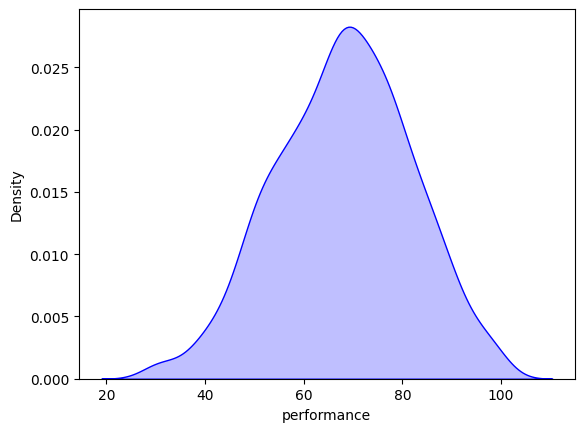

In [ ]:
sns.kdeplot(df['performance'],shade=True,color='blue') # slightly skewned
#negative skewnes

In [ ]:
c=df.select_dtypes('object').columns # added all object columns in variable (c)
c

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()  # created new variable oe

In [ ]:
oe=OrdinalEncoder()
df[c]=oe.fit_transform(df[c])  #Ordinal encoder applied on all the categorical columns once at all
df[c]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0.0,1.0,1.0,1.0,1.0
1,0.0,2.0,4.0,1.0,0.0
2,0.0,1.0,3.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,2.0,4.0,1.0,1.0
...,...,...,...,...,...
995,0.0,4.0,3.0,1.0,0.0
996,1.0,2.0,2.0,0.0,1.0
997,0.0,2.0,2.0,0.0,0.0
998,0.0,3.0,4.0,1.0,0.0


In [ ]:
df[c].value_counts()

gender  race/ethnicity  parental level of education  lunch  test preparation course
0.0     2.0             0.0                          1.0    1.0                        21
                        4.0                          1.0    1.0                        19
1.0     2.0             2.0                          1.0    1.0                        17
0.0     2.0             0.0                          1.0    0.0                        15
                        2.0                          1.0    1.0                        15
                                                                                       ..
        3.0             3.0                          0.0    1.0                         1
                        1.0                          0.0    0.0                         1
        2.0             3.0                          1.0    1.0                         1
                                                     0.0    0.0                         1
        4.0             5.0                          1.0    1.0                         1
Name: count, Length: 211, dtype: int64

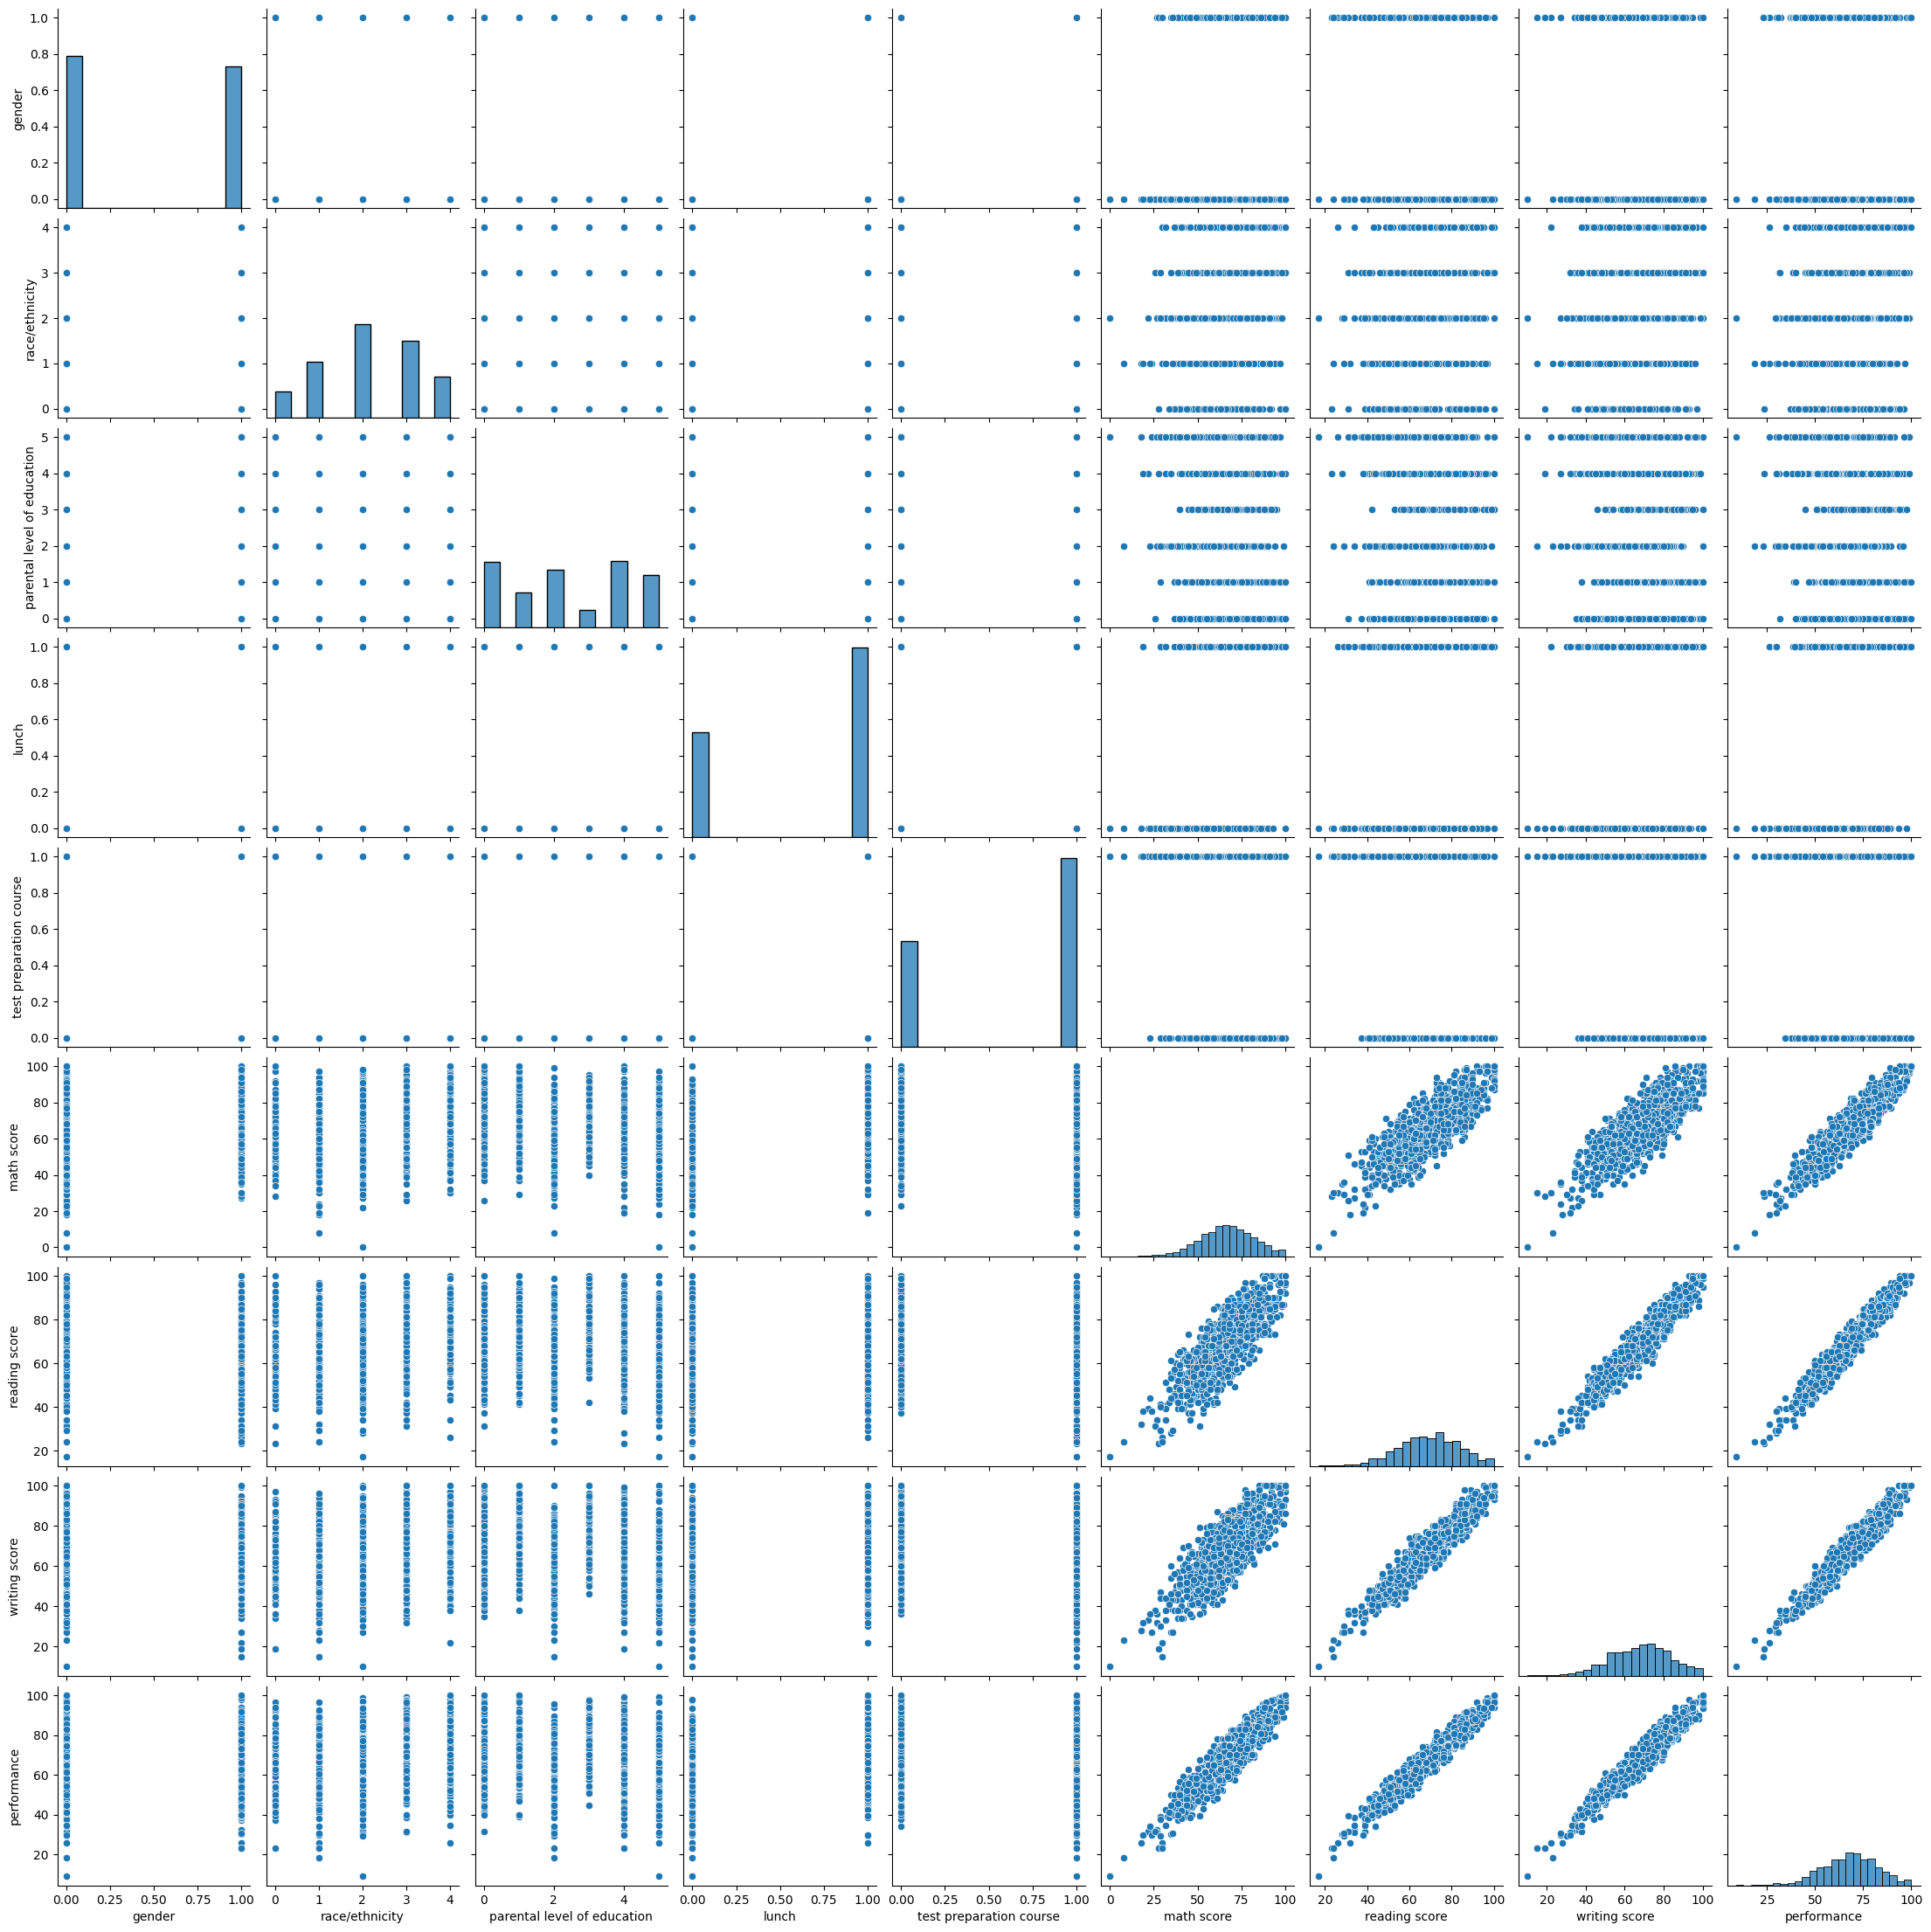

In [ ]:
sns.pairplot(df)  #this plot shows distribution of data #linearity is failed

<Axes: >

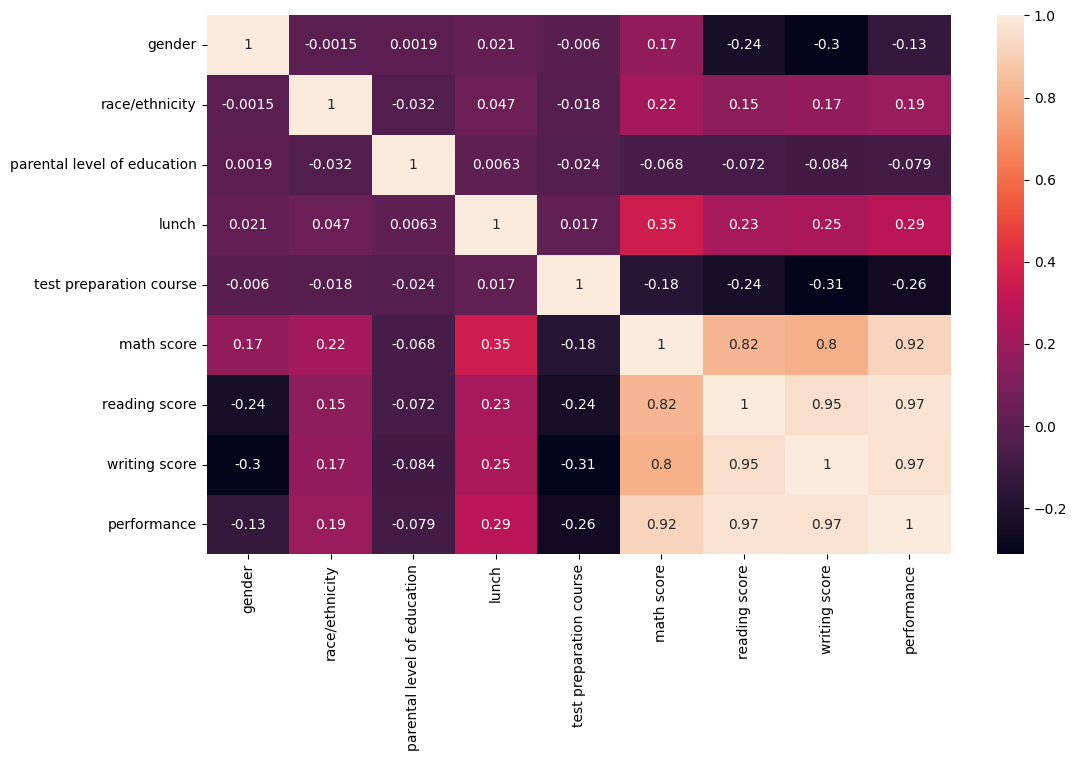

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True) # more the one column correlated-----muliticolinearity is failed

gender


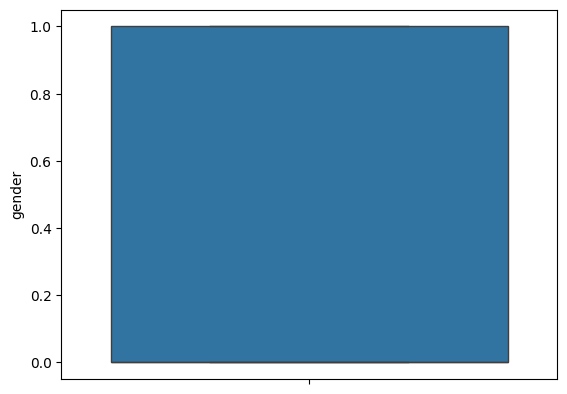

race/ethnicity


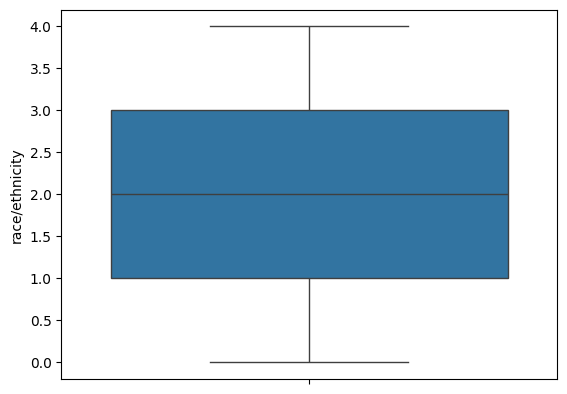

parental level of education


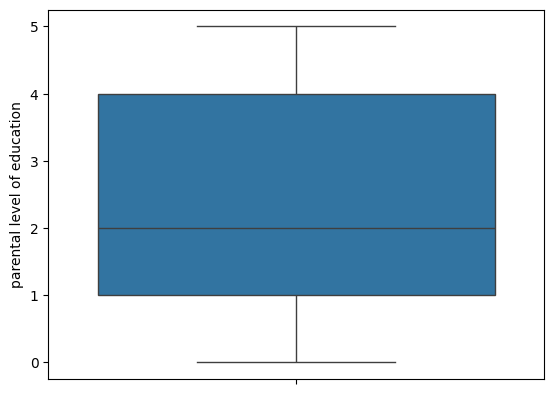

lunch


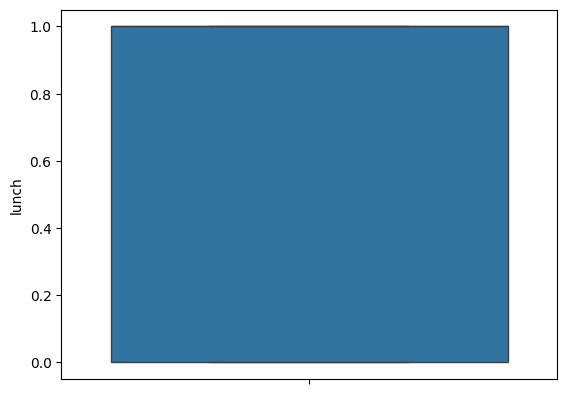

test preparation course


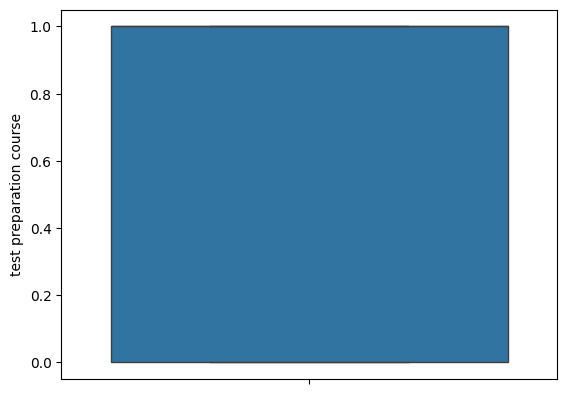

math score


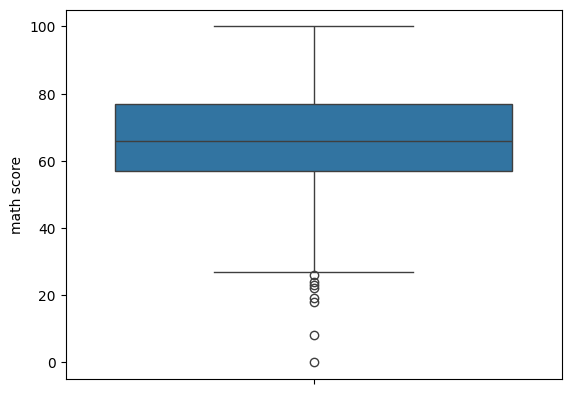

reading score


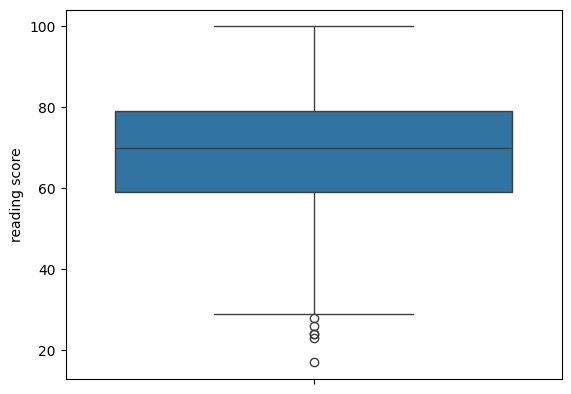

writing score


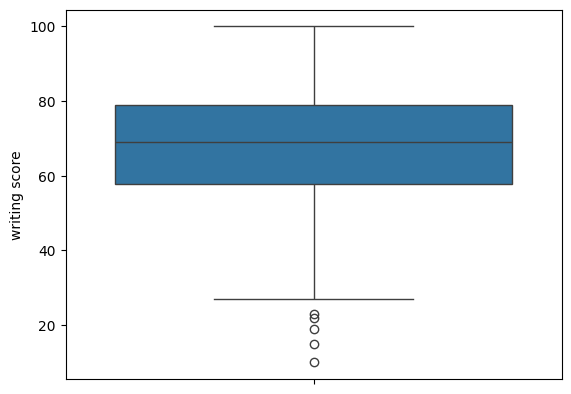

performance


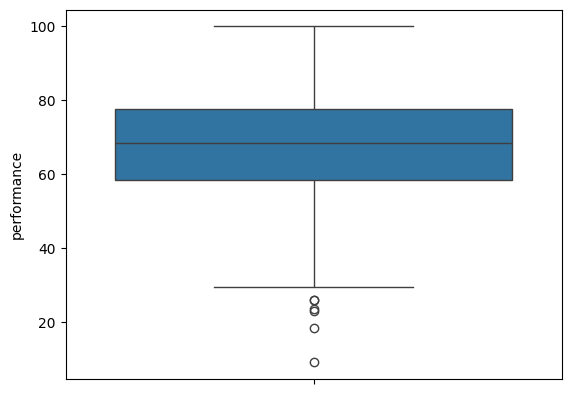

In [ ]:
for col in df:
  print(col)
  sns.boxplot(df[col])
  plt.show()

In [ ]:
numerical_cols=df.select_dtypes(include=[np.number]).columns

In [ ]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column]=np.where((df[column]<lower_bound)|(df[column]>upper_bound),median_value,df[column])

In [ ]:
for col in numerical_cols:
  replace_outliers_with_median(df,col)

gender


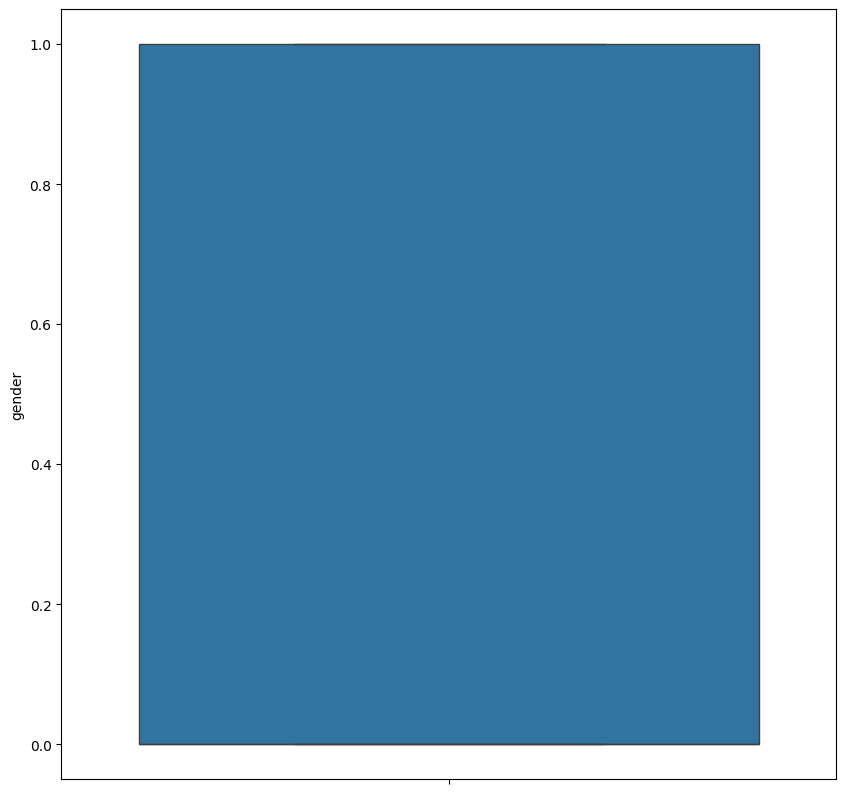

race/ethnicity


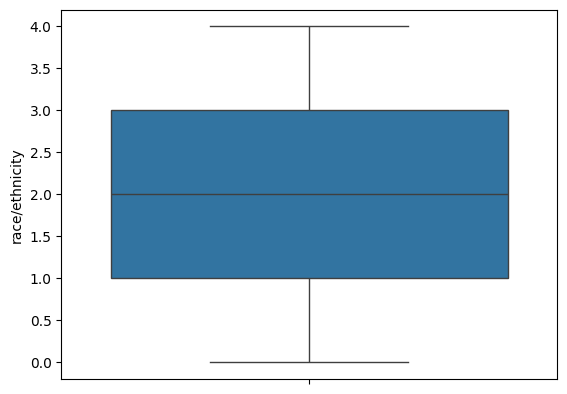

parental level of education


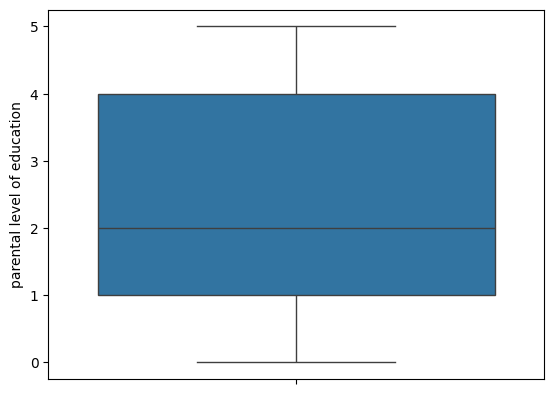

lunch


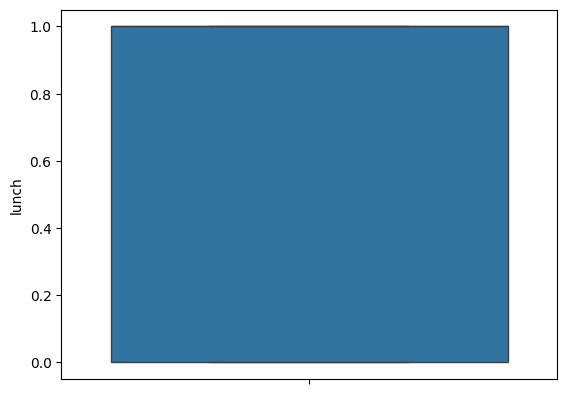

test preparation course


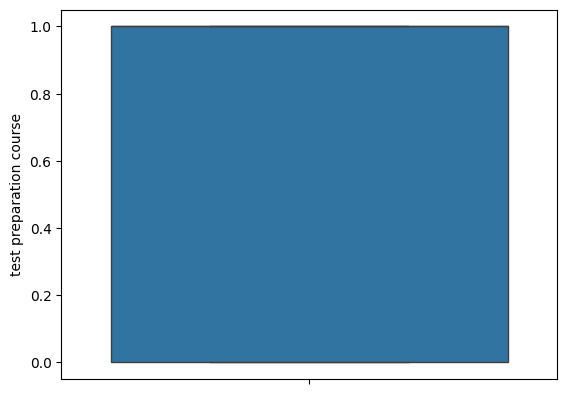

math score


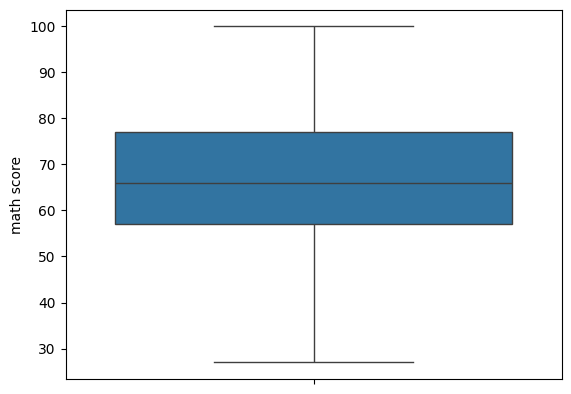

reading score


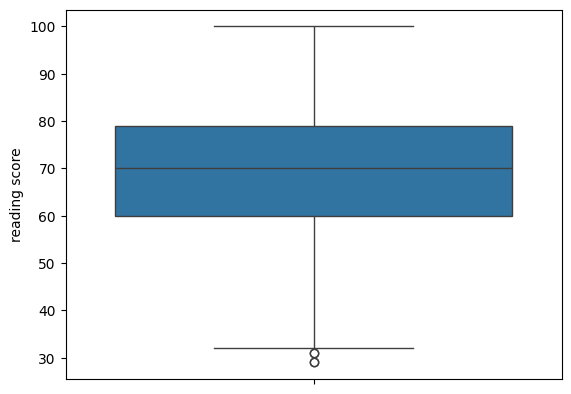

writing score


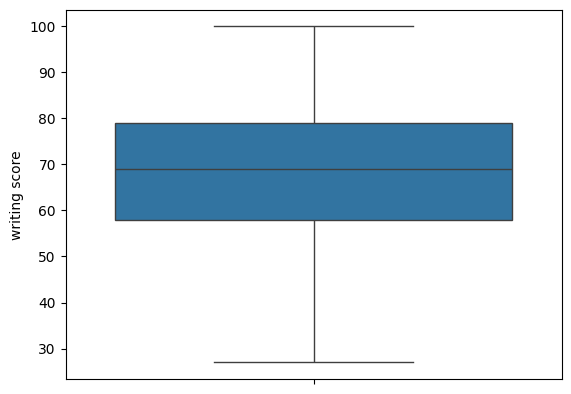

performance


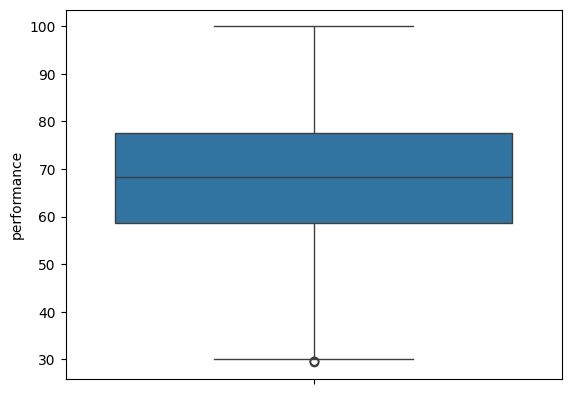

In [ ]:
plt.figure(figsize=(10,10))
for col in df:
  print(col)
  sns.boxplot(df[col])
  plt.show()

In [ ]:
features=df.drop('performance',axis=1)  # selection of features and target
target=df['performance']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training Data Shape",xtrain.shape,ytrain.shape)
print("Testing Data Shape",xtest.shape,ytest.shape)

Training Data Shape (800, 8) (800,)
Testing Data Shape (200, 8) (200,)


In [ ]:
features.shape #shows the no. of rows & there columns

(1000, 8)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(ypred,ytest)  #to measure the average squared difference between actual and predicted values
r2=r2_score(ypred,ytest)
print(f"mean_squared_error : {mse}")
print(f"Accurancy of model : {r2}")

mean_squared_error : 2.1369649045422916
Accurancy of model : 0.9880412882988613


In [ ]:
lr.score(xtrain,ytrain)

0.9887453136963819

In [ ]:
lr.score(xtest,ytest)

0.988147997515506

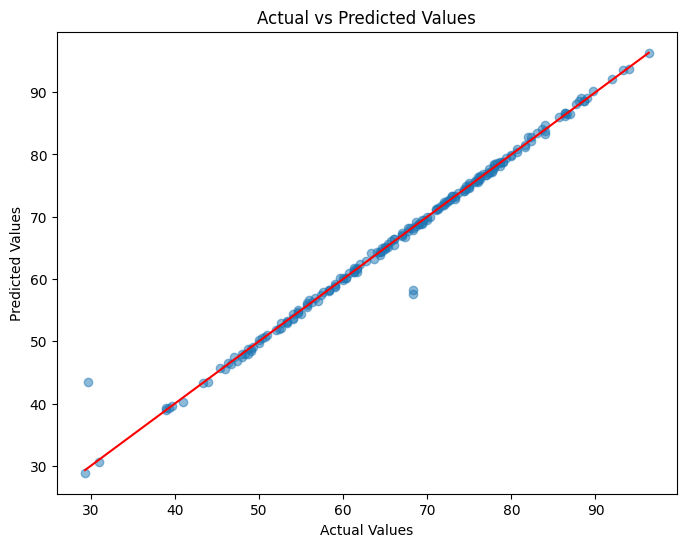

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='-')  # Perfect fit line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()